In [1]:
from os.path import join, basename, splitext
from glob import glob
from matplotlib import rcParams
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from deep_aqi import ROOT

pd.set_option('expand_frame_repr', False)

In [2]:
def clean_outliers(data, sigma=10):
    # according to chebyshev inequality 10sigma covers 99% percent of data despite the distribution
    top = data[target_column].mean() + sigma * data[target_column].std()
    return data.loc[data[target_column] < top]

In [3]:
PROCESSED_DATA = join(ROOT, 'data', 'processed')
PLOT_DIR = join(ROOT, 'jupyter', 'plots')

# Looking for hourly/daily/monthly patterns in target with and without outliers (data_source and clean_source)

In [24]:
# file_path = join(PROCESSED_DATA, '88101.parquet') # PM2.5 FRM/FEM Mass
# file_path = join(PROCESSED_DATA, '88502.parquet') # PM2.5 non FRM/FEM Mass
# file_path = join(PROCESSED_DATA, '81102.parquet') # PM10 Mass
# file_path = join(PROCESSED_DATA, '44201.parquet') # Ozone
# file_path = join(PROCESSED_DATA, '42401.parquet') # SO2
# file_path = join(PROCESSED_DATA, '42101.parquet') # CO
file_path = join(PROCESSED_DATA, '42602.parquet') # NO2


data_source = pd.read_parquet(file_path)
target_column = data_source.columns[-1]

In [25]:
data_source['hour'] = data_source.LocalDate.dt.hour
data_source['weekday'] = data_source.LocalDate.dt.weekday
data_source['month'] = data_source.LocalDate.dt.month

In [26]:
clean_source = clean_outliers(data_source)
print(f'clean_source has {len(data_source) - len(clean_source)} less observations, out of {len(data_source)}')
print(f'There are: {data_source.SiteCode.nunique()} sites in dataset.')

clean_source has 1 less observations, out of 1635271
There are: 50 sites in dataset.


In [27]:
temp = data_source.groupby(by=data_source.LocalDate.dt.date).mean()

# rcParams["figure.figsize"] = (24, 4)
# sns.lineplot(x=temp.index, y=temp[target_column])

In [28]:
year = 2017
data_source = data_source.loc[data_source.LocalDate.dt.year == year, :]
clean_source = clean_source.loc[clean_source.LocalDate.dt.year == year, :]

temp = data_source.groupby(by=data_source.LocalDate.dt.date).mean()

# rcParams["figure.figsize"] = (24, 4)
# sns.lineplot(x=temp.index, y=temp[target_column])

## Is there hourly pattern in data ?

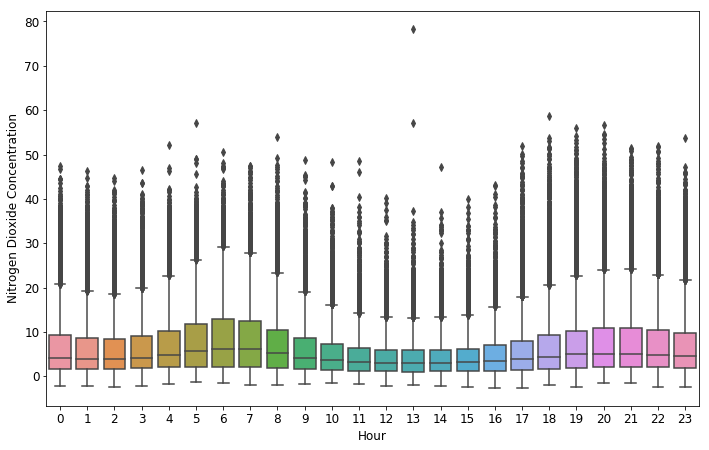

In [29]:
rcParams["figure.figsize"] = (11.69, 7.27)
rcParams["font.size"] = (12)

sns.boxplot(y=clean_source[target_column],
            x=clean_source.hour,
            orient='v')

plt.xlabel("Hour")
plt.ylabel("Nitrogen Dioxide Concentration")

save_path = join(PLOT_DIR, f'pm25.png')
plt.savefig(save_path)

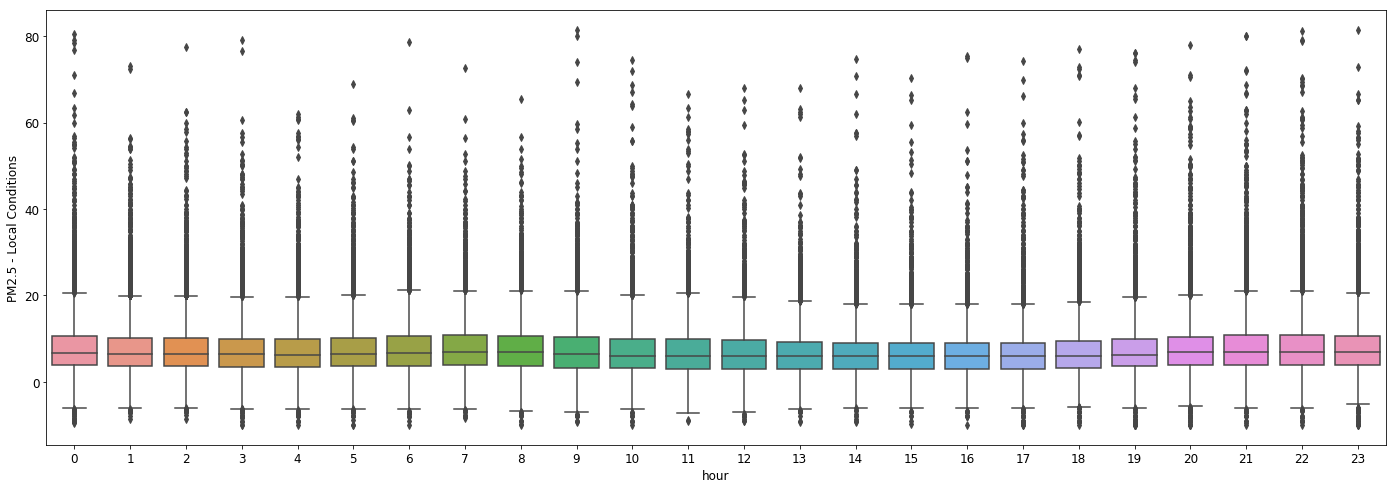

In [10]:
rcParams["figure.figsize"] = (24, 8)
sns.boxplot(y=clean_source[target_column],
            x=clean_source.hour,
            orient='v')

C:\Users\filip\anaconda\envs\deep_aqi\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


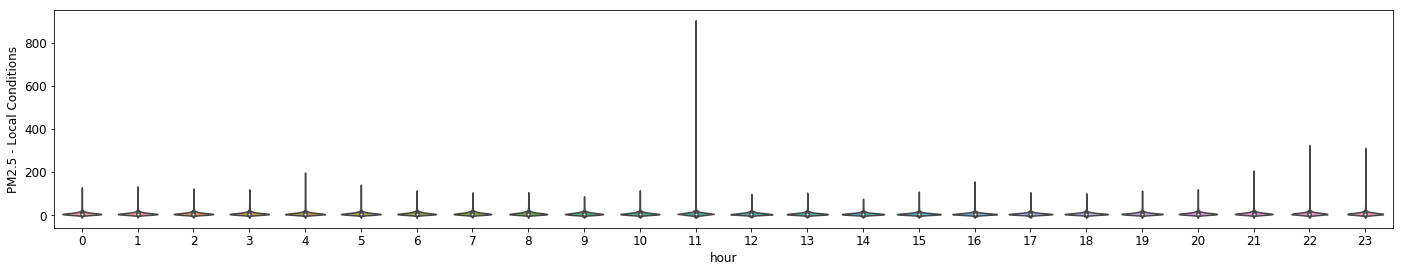

In [11]:
rcParams["figure.figsize"] = (24, 4)
sns.violinplot(y=data_source[target_column],
               x=data_source.hour,
               orient='v')

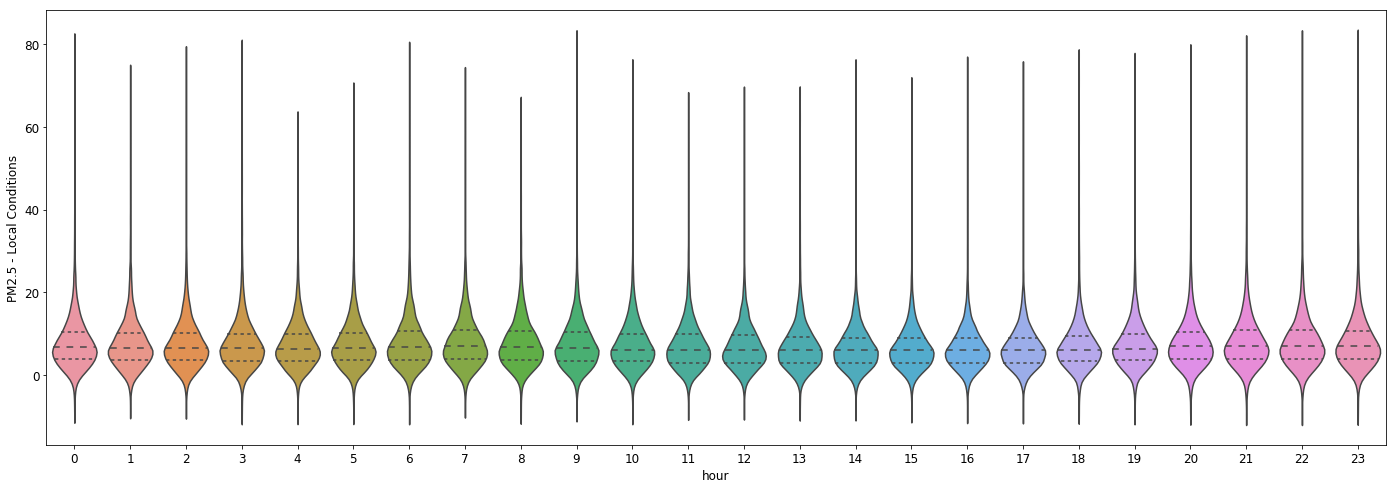

In [12]:
rcParams["figure.figsize"] = (24, 8)
sns.violinplot(y=clean_source[target_column],
               x=clean_source.hour,
               orient='v',
               inner='quartile',
               scale='count')

### It may seem there is no general pattern, let's try it for 3 random sites.

Kentucky_Jefferson_43.0


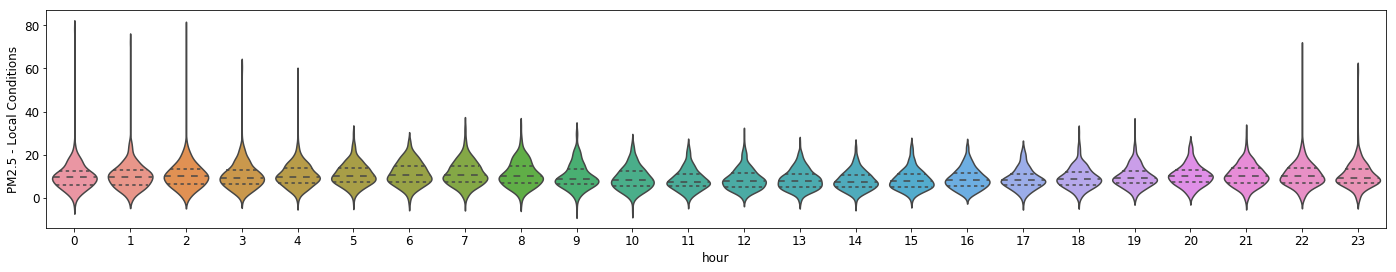

In [13]:
random_site = data_source.SiteCode.sample(1).values[0]
print(random_site)
temp = clean_source[clean_source.SiteCode == random_site]

rcParams["figure.figsize"] = (24, 4)
sns.violinplot(y=temp[target_column],
               x=temp.hour,
               orient='v',
               inner='quartile',
               scale='count')

Rhode Island_Providence_1010.0


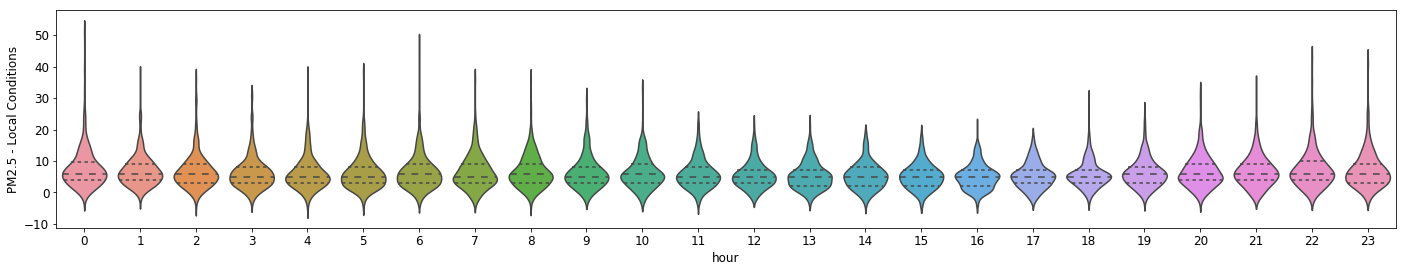

In [14]:
random_site = data_source.SiteCode.sample(1).values[0]
print(random_site)
temp = clean_source[clean_source.SiteCode == random_site]

rcParams["figure.figsize"] = (24, 4)
sns.violinplot(y=temp[target_column],
               x=temp.hour,
               orient='v',
               inner='quartile',
               scale='count')

Indiana_Marion_78.0


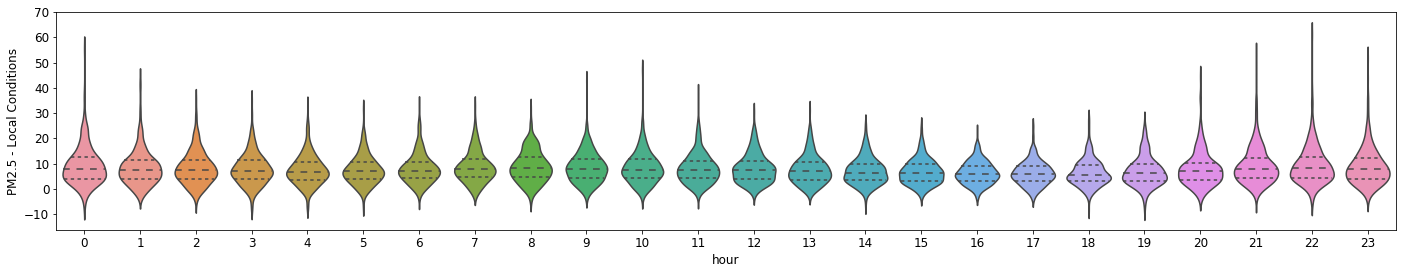

In [15]:
random_site = data_source.SiteCode.sample(1).values[0]
print(random_site)
temp = clean_source[clean_source.SiteCode == random_site]

rcParams["figure.figsize"] = (24, 4)
sns.violinplot(y=temp[target_column],
               x=temp.hour,
               orient='v',
               inner='quartile',
               scale='count')

### Conclusions:

* PMs have higher values in morning and evening rush hours - cars
* O3 is significantly higher during day than night - [daily O3 pattern](http://www.sparetheair.org/stay-informed/ozone/a-day-in-the-life)



## Is there daily pattern in data ?

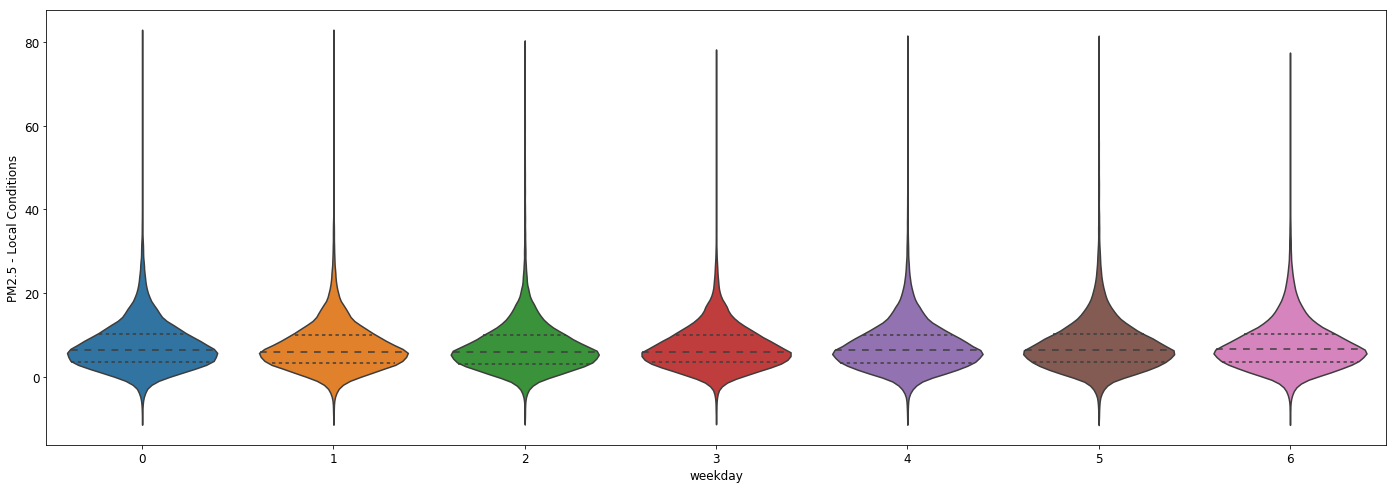

In [16]:
rcParams["figure.figsize"] = (24, 8)
sns.violinplot(y=clean_source[target_column],
               x=clean_source.weekday,
               orient='v',
               inner='quartile',
               scale='count')

### It may seem there is no general pattern, let's try it for 3 random sites.

Nevada_Clark_540.0


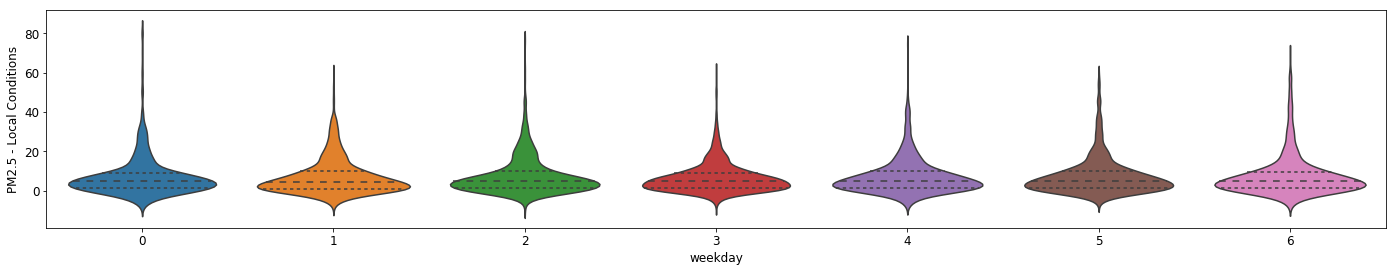

In [17]:
random_site = data_source.SiteCode.sample(1).values[0]
print(random_site)
temp = clean_source[clean_source.SiteCode == random_site]

rcParams["figure.figsize"] = (24, 4)
sns.violinplot(y=temp[target_column],
               x=temp.weekday,
               orient='v',
               inner='quartile',
               scale='count')

California_Madera_2010.0


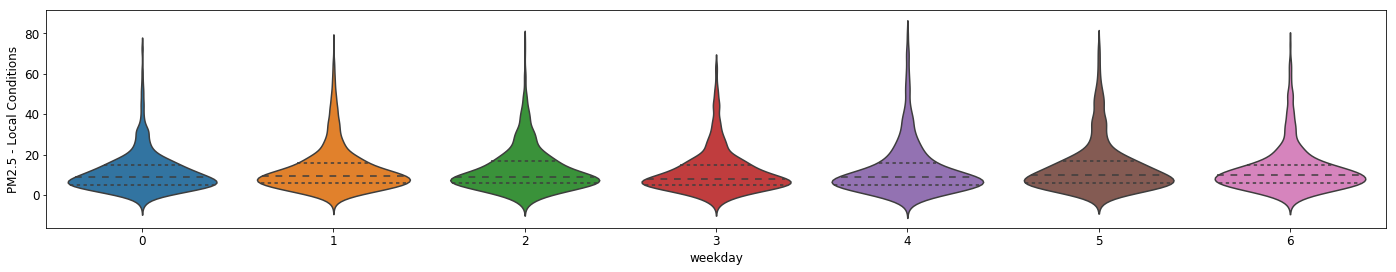

In [18]:
random_site = data_source.SiteCode.sample(1).values[0]
print(random_site)
temp = clean_source[clean_source.SiteCode == random_site]

rcParams["figure.figsize"] = (24, 4)
sns.violinplot(y=temp[target_column],
               x=temp.weekday,
               orient='v',
               inner='quartile',
               scale='count')

Missouri_Cass_3.0


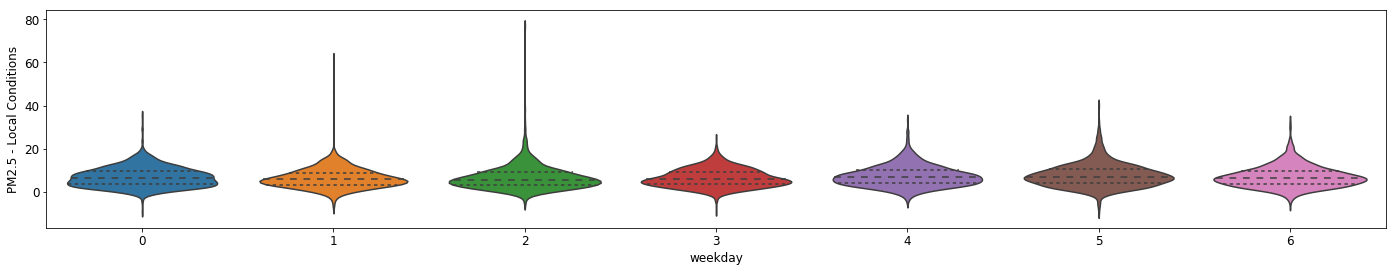

In [19]:
random_site = data_source.SiteCode.sample(1).values[0]
print(random_site)
temp = clean_source[clean_source.SiteCode == random_site]

rcParams["figure.figsize"] = (24, 4)
sns.violinplot(y=temp[target_column],
               x=temp.weekday,
               orient='v',
               inner='quartile',
               scale='count')

Con

## Is there monthly pattern in data ?

In [20]:
# rcParams["figure.figsize"] = (24, 8)
# sns.violinplot(y=clean_source[target_column],
#                x=clean_source.month,
#                orient='v',
#                inner='quartile',
#                scale='count')

rcParams["figure.figsize"] = (11.69, 7.27)
rcParams["font.size"] = (12)

sns.boxplot(y=data_source[target_column],
            x=clean_source.month,)
#             orient='v')

plt.xlabel("Month")
plt.ylabel("Ozone Concentration")

save_path = join(PLOT_DIR, f'ozone_monthly_dist.png')
# plt.savefig(save_path)

ValueError: cannot reindex from a duplicate axis

### It may seem there is no general pattern, let's try it for 3 random sites.

In [ ]:
random_site = data_source.SiteCode.sample(1).values[0]
print(random_site)
temp = clean_source[clean_source.SiteCode == random_site]

rcParams["figure.figsize"] = (24, 4)
sns.violinplot(y=temp[target_column],
               x=temp.month,
               orient='v',
               inner='quartile',
               scale='count')

In [ ]:
random_site = data_source.SiteCode.sample(1).values[0]
print(random_site)
temp = clean_source[clean_source.SiteCode == random_site]

rcParams["figure.figsize"] = (24, 4)
sns.violinplot(y=temp[target_column],
               x=temp.month,
               orient='v',
               inner='quartile',
               scale='count')

In [ ]:
random_site = data_source.SiteCode.sample(1).values[0]
print(random_site)
temp = clean_source[clean_source.SiteCode == random_site]

rcParams["figure.figsize"] = (24, 4)
sns.violinplot(y=temp[target_column],
               x=temp.month,
               orient='v',
               inner='quartile',
               scale='count')